In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch

%matplotlib inline
import matplotlib
import sklearn
import time
from sklearn.preprocessing import normalize
import math

/Users/chulu.xiang/opt/anaconda3/envs/xcl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
import cubicsolver
torch.set_default_dtype(torch.float64)

In [4]:
a=np.array([2,1,-1])

In [5]:
v1=np.max(a)
v2=np.min(a)
v2

-1

# Generate data


$f(x) = \frac1n \sum_{i=1}^n \frac12(a_i^Tx-b_i)^2$
suppose $x^*=xo$, $b_i=a_i^Txo$

In [6]:
np.random.seed(0)
n = 100
d = 20
A = np.random.randn(n,d)
xopt = np.random.randn(d)
b=np.dot(A,xopt)
tA = torch.Tensor(A)
tb = torch.Tensor(b)
xopt = torch.Tensor(xopt)

In [7]:
H=1/n*tA.T@tA

In [8]:
IH = torch.inverse(H)

In [9]:
torch.diag(H)

tensor([1.0051, 0.8142, 0.8366, 1.2102, 0.7942, 1.0755, 0.8230, 1.1376, 1.1551,
        0.8674, 0.8934, 1.1455, 0.9394, 0.9525, 1.0471, 0.7997, 0.8952, 0.8653,
        1.1100, 0.7710])

In [10]:
diagH = 1/n*torch.diag(tA.T@tA)
diagIH = 1/diagH
diagIH

tensor([0.9949, 1.2282, 1.1953, 0.8263, 1.2591, 0.9298, 1.2151, 0.8790, 0.8657,
        1.1529, 1.1194, 0.8730, 1.0645, 1.0498, 0.9550, 1.2504, 1.1171, 1.1557,
        0.9009, 1.2970])

In [11]:
1/torch.mean(tA*tA,dim=0)

tensor([0.9949, 1.2282, 1.1953, 0.8263, 1.2591, 0.9298, 1.2151, 0.8790, 0.8657,
        1.1529, 1.1194, 0.8730, 1.0645, 1.0498, 0.9550, 1.2504, 1.1171, 1.1557,
        0.9009, 1.2970])

In [12]:
v = torch.rand(d,1)

In [13]:
scale = torch.zeros(d,1)

In [14]:
import random
for i in range(d):
    scale[i]=random.randint(-3,4)
    

In [15]:
scale

tensor([[ 3.],
        [ 2.],
        [ 1.],
        [ 3.],
        [-3.],
        [ 4.],
        [ 4.],
        [ 0.],
        [-2.],
        [ 4.],
        [ 1.],
        [ 2.],
        [-2.],
        [-3.],
        [ 3.],
        [-3.],
        [ 0.],
        [ 2.],
        [ 2.],
        [ 2.]])

In [16]:
v = v * torch.pow(10,scale)
v


tensor([[3.8191e+02],
        [9.8565e+01],
        [6.6946e+00],
        [2.2094e+01],
        [5.9756e-04],
        [7.2536e+03],
        [8.2398e+03],
        [4.8430e-03],
        [9.3182e-03],
        [7.1198e+02],
        [5.2486e+00],
        [9.0083e+01],
        [4.5064e-03],
        [9.6907e-04],
        [1.1930e+02],
        [3.8961e-04],
        [9.6222e-01],
        [3.2724e+01],
        [3.0948e+01],
        [4.4619e+01]])

In [17]:
Atilde = tA * v.T

In [18]:
Htilde = 1/n*Atilde.T@Atilde

In [19]:
n*torch.inverse(Atilde.T@Atilde)

tensor([[ 8.1892e-06, -4.5223e-06,  4.9840e-05, -1.3687e-05, -1.6766e-01,
         -1.2616e-08, -1.1740e-08, -4.6095e-02,  5.2671e-03, -3.1588e-08,
          3.0588e-05, -4.8531e-07,  2.0185e-02, -8.8818e-01, -2.3139e-06,
          1.4684e-01,  5.2866e-04,  4.8312e-06, -3.6966e-06, -4.9911e-06],
        [-4.5223e-06,  1.4787e-04,  1.3991e-04,  1.0595e-05, -5.1781e+00,
         -2.0852e-08, -8.8912e-08,  4.8242e-02, -9.9485e-02,  4.4119e-07,
         -3.4347e-04, -2.8306e-06, -8.5526e-02, -8.0118e-02,  1.3052e-06,
          6.0933e+00, -1.4139e-03, -3.5599e-05,  1.7545e-05, -1.4926e-05],
        [ 4.9840e-05,  1.3991e-04,  3.0019e-02,  6.7302e-05, -1.9518e+01,
         -7.4234e-07, -7.3527e-07,  2.1963e-01,  4.7685e-01, -3.9897e-05,
         -5.8386e-03, -1.0343e-04, -2.2228e+00, -5.0453e+00, -1.4157e-04,
         -4.1118e+00,  2.7298e-03,  7.4296e-04, -1.3460e-04,  7.2923e-04],
        [-1.3687e-05,  1.0595e-05,  6.7302e-05,  2.0423e-03,  1.2049e+00,
         -8.5219e-07, -8.2683e-07, 

In [20]:
diagHtilde = torch.mean(Atilde*Atilde,dim=0)
diagIHtilde  =1/diagHtilde

In [21]:
IHtilde = torch.inverse(Htilde)

In [22]:
IHtilde

tensor([[ 8.1892e-06, -4.5223e-06,  4.9840e-05, -1.3687e-05, -1.6766e-01,
         -1.2616e-08, -1.1740e-08, -4.6095e-02,  5.2671e-03, -3.1588e-08,
          3.0588e-05, -4.8531e-07,  2.0185e-02, -8.8818e-01, -2.3139e-06,
          1.4684e-01,  5.2866e-04,  4.8312e-06, -3.6966e-06, -4.9911e-06],
        [-4.5223e-06,  1.4787e-04,  1.3991e-04,  1.0595e-05, -5.1781e+00,
         -2.0852e-08, -8.8912e-08,  4.8242e-02, -9.9485e-02,  4.4119e-07,
         -3.4347e-04, -2.8306e-06, -8.5526e-02, -8.0118e-02,  1.3052e-06,
          6.0933e+00, -1.4139e-03, -3.5599e-05,  1.7545e-05, -1.4926e-05],
        [ 4.9840e-05,  1.3991e-04,  3.0019e-02,  6.7302e-05, -1.9518e+01,
         -7.4234e-07, -7.3527e-07,  2.1963e-01,  4.7685e-01, -3.9897e-05,
         -5.8386e-03, -1.0343e-04, -2.2228e+00, -5.0453e+00, -1.4157e-04,
         -4.1118e+00,  2.7298e-03,  7.4296e-04, -1.3460e-04,  7.2923e-04],
        [-1.3687e-05,  1.0595e-05,  6.7302e-05,  2.0423e-03,  1.2049e+00,
         -8.5219e-07, -8.2683e-07, 

In [23]:
def fun(At,x,bt):
    return 1/2*torch.mean(torch.norm(At@x-bt)**2)

In [24]:
def dfun(At,x,bt):
    return At.T@(At@x-bt)

# SGD

loss= 1208.2156951670636
loss= 75.53895294787718
loss= 13.085190859855555
loss= 3.7796525710057307
loss= 1.372348185816705
loss= 0.537122779885059
loss= 0.2223637584607027
loss= 0.095539470381915
loss= 0.037935361079862014
loss= 0.016046771983412735
loss= 0.006942694824707769
loss= 0.0029345256876754937
loss= 0.0012930990171212636
loss= 0.0005834220097587771
loss= 0.00024951069945993365
loss= 0.00011391304887122357
loss= 4.849976539661585e-05
loss= 2.2708145055841575e-05
loss= 9.313446399614617e-06
loss= 4.2142369734232645e-06
loss= 1.7838711967420954e-06
loss= 7.893491689272581e-07
loss= 3.524557859792529e-07
loss= 1.5339786091480662e-07
loss= 6.67463632341206e-08
loss= 2.9698282739710398e-08
loss= 1.29442965000082e-08
loss= 5.66284662889956e-09
loss= 2.559463295967781e-09
loss= 1.140928331639512e-09
loss= 5.177998730331454e-10
loss= 2.3039919639071197e-10
loss= 9.534697068539194e-11
loss= 4.386907207542062e-11
loss= 1.841229465371392e-11
loss= 8.314809235620706e-12
loss= 3.5799360182

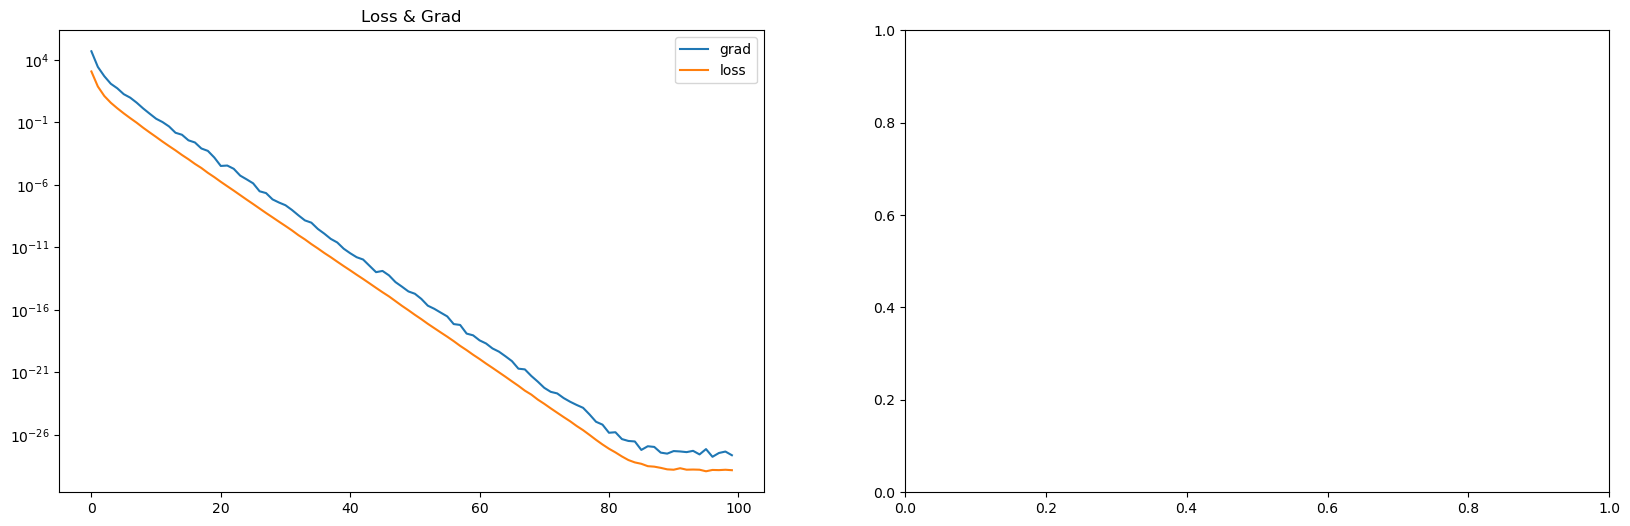

In [25]:
data = torch.utils.data.TensorDataset(tA, tb)
BS = 50
trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)
w = torch.zeros(d, requires_grad=True)
hist_grad=[]
hist_loss=[]
for it in range(100):
    loss=fun(tA,w,tb)
    hist_loss.append(loss.item())    
    print('loss=',loss.item())
    for i,(xx,yy) in enumerate (trainloader):
        # hist_loss.append((1/2*torch.mean(torch.norm(tA@w-tb)**2)).item())    
        # print('loss=',1/2*torch.mean(torch.norm(tA@w-tb)**2))
        loss = fun(xx,w,yy)
        grad_f, = torch.autograd.grad(loss, w, create_graph=True)    
        gd=dfun(xx,w,yy)
        w=w-0.01*grad_f
    hist_grad.append((torch.norm(grad_f)**2).item())
# plt.plot(torch.tensor(hist_loss),label='loss')
# plt.plot(torch.tensor(hist_grad),label='grad')
fig,(ax1,ax2) = plt.subplots(1,2);fig.set_size_inches(20, 6)
ax1.semilogy(torch.tensor(hist_grad),label='grad')
ax1.semilogy(torch.tensor(hist_loss),label='loss')
ax1.title.set_text('Loss & Grad')
ax1.legend()


In [26]:
def diag_estimate(data_shape_cols, grad, weights, iters):
    Ds = []
    for j in range(iters):
        v = torch.rand(d)
        D = torch.autograd.grad( torch.sum(grad*v) , weights, retain_graph=True)    
        D=torch.stack(D,dim=0)
        Ds.append(D*v)

    return torch.mean(torch.stack(Ds), 0)

In [27]:
def diag_estimate1(data_shape_cols, grad, weights, iters):
    Ds = []
    for j in range(iters):
        v = torch.round(torch.rand(d)) * 2 - 1
        D = torch.autograd.grad( torch.sum(grad*v) , weights, retain_graph=True)    
        D = torch.stack(D,dim=0)
        Ds.append(D*v)

    return torch.mean(torch.stack(Ds), 0)

In [28]:
# compute for v (lagrangian mutiplier)
# the inverse of (v*B+D)
def g_v(v,f,gradf,B,D):
    D_inv=torch.linalg.inv(D)
    inv=D_inv-1/(1+v*torch.trace(B@D_inv))*(D_inv@B@D_inv)
    return -v*f+1/2*v**2*torch.dot(gradf,inv@gradf)

In [29]:
def dg_v(v,f,gradf,B,D):
    D_inv=torch.linalg.inv(D)
    a=torch.dot(gradf,D_inv@gradf)
    b=torch.dot(gradf,D_inv@B@D_inv@gradf)
    c=torch.trace(B@D_inv)
    return -f+a*v-b/2*(c*v**2+2*v)/(1+c*v)**2

### SPS

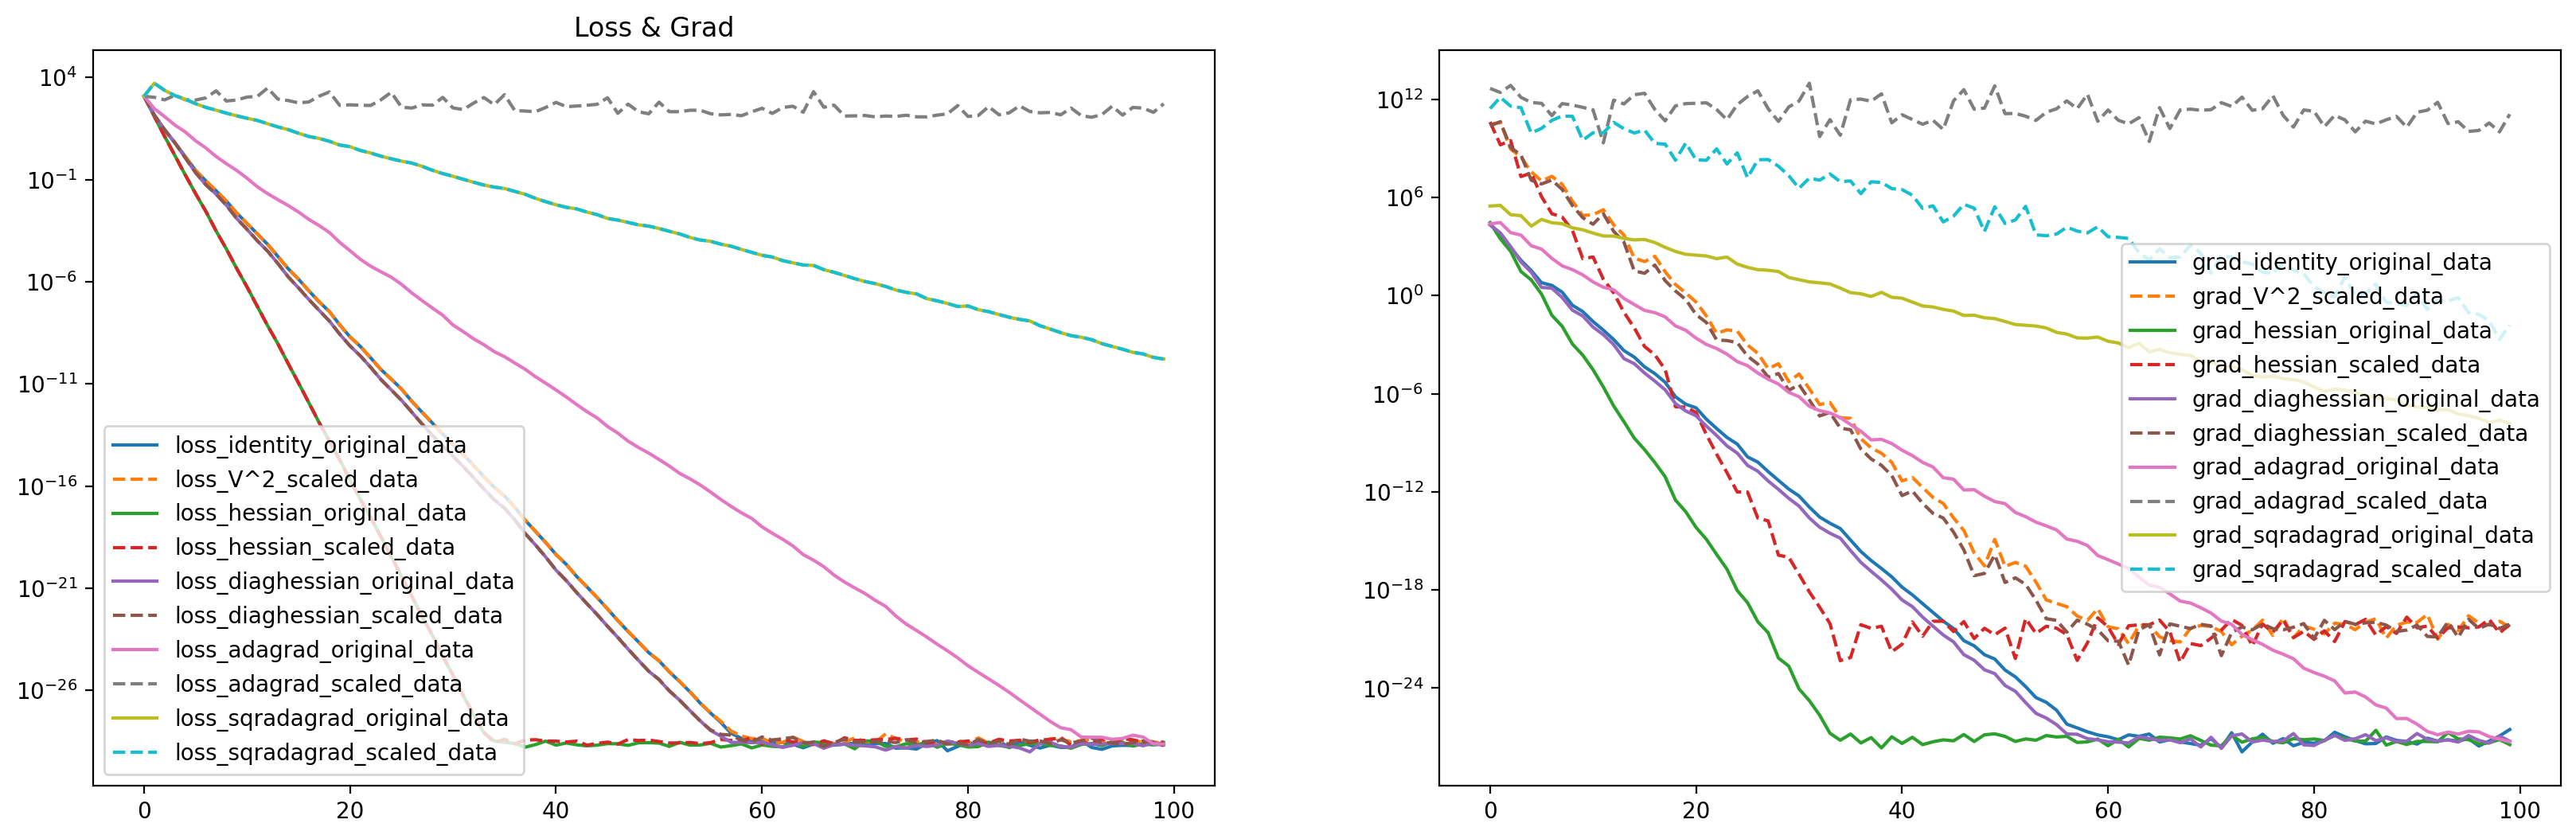

In [34]:
Gsqr_wadagrad = torch.zeros(d)
Gsqr_wvadagrad = torch.zeros(d)
Gsqr_wadagrad2 = torch.zeros(d)
Gsqr_wvadagrad2 = torch.zeros(d)
data = torch.utils.data.TensorDataset(tA, tb)
BS = 50
torch.manual_seed(0)
trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)
w = torch.zeros(d, requires_grad=True)
whess = torch.zeros(d, requires_grad=True)
wv2 = torch.zeros(d, requires_grad=True)
wvhess = torch.zeros(d, requires_grad=True)
wdiag = torch.zeros(d, requires_grad=True)
wvdiag = torch.zeros(d, requires_grad=True)
wadagrad = torch.zeros(d, requires_grad=True)
wvadagrad = torch.zeros(d, requires_grad=True)
wadagrad2 = torch.zeros(d, requires_grad=True)
wvadagrad2 = torch.zeros(d, requires_grad=True)
hist_grad=[]
hist_grad_whess = []
hist_grad_wv2 = []
hist_grad_wvhess = []
hist_grad_wdiag =[]
hist_grad_wvdiag = []
hist_grad_wadagrad = []
hist_grad_wvadagrad = []
hist_grad_wadagrad2 = []
hist_grad_wvadagrad2 = []

hist_loss=[]
hist_losshess = []
hist_losswv2=[]
hist_losswvhess = []
hist_losswdiag = []
hist_losswvdiag = []
hist_losswadagrad = []
hist_losswvadagrad = []
hist_losswadagrad2 = []
hist_losswvadagrad2 = []

hist_whesswvhess = []
hist_whesswvhess.append(torch.norm(whess-wvhess*(v.reshape(-1))))
hist_wwv2 = []
hist_wwv2.append(torch.norm(w-wv2*(v.reshape(-1))))
hist_wwvhess = []
hist_wwvhess.append(torch.norm(w-wvhess*(v.reshape(-1))))
hist_wdiagwvdiag = []
hist_wdiagwvdiag.append(torch.norm(wdiag-wvdiag*(v.reshape(-1))))
for step in range(100):
    loss=fun(tA,w,tb)
    losshess = fun(tA,whess,tb)
    losswv2 = fun(Atilde,wv2,tb)
    losswvhess = fun(Atilde,wvhess,tb)
    losswdiag = fun(tA,wdiag,tb)
    losswvdiag = fun(Atilde,wvdiag,tb)
    losswadagrad = fun(tA,wadagrad,tb)
    losswvadagrad = fun(Atilde,wvadagrad,tb)
    losswadagrad2 = fun(tA,wadagrad2,tb)
    losswvadagrad2 = fun(Atilde,wvadagrad2,tb)
    hist_loss.append(loss.item())  
    hist_losshess.append(losshess.item())
    hist_losswv2.append(losswv2.item())  
    hist_losswvhess.append(losswvhess.item())
    hist_losswdiag.append(losswdiag.item())
    hist_losswvdiag.append(losswvdiag.item())
    hist_losswadagrad.append(losswadagrad.item())
    hist_losswvadagrad.append(losswvadagrad.item())
    hist_losswadagrad2.append(losswadagrad2.item())
    hist_losswvadagrad2.append(losswvadagrad2.item())
    # print('loss=',loss.item())
    for i,(xx,yy) in enumerate(trainloader):
        loss = fun(xx,w,yy)
        losshess = fun(xx,whess,yy)
        losswdiag = fun(xx,wdiag,yy)
        losswadagrad = fun(xx,wadagrad,yy)
        losswadagrad2 = fun(xx,wadagrad2,yy)
        xxv = xx*v.T
        losswv2 = fun(xxv,wv2,yy)
        losswvhess = fun(xxv,wvhess,yy)
        losswvdiag = fun(xxv,wvdiag,yy)
        losswvadagrad = fun(xxv,wvadagrad,yy)
        losswvadagrad2 = fun(xxv,wvadagrad2,yy)
        grad_f, = torch.autograd.grad(loss, w, create_graph=True)
        # precond = torch.min((loss / (torch.linalg.norm(g) ** 2 + epsilon)), eta)
        grad_whess, = torch.autograd.grad(losshess, whess, create_graph=True)
        grad_wv2, = torch.autograd.grad(losswv2,wv2,create_graph=True)
        grad_wvhess, = torch.autograd.grad(losswvhess,wvhess,create_graph=True)
        grad_wdiag, = torch.autograd.grad(losswdiag,wdiag,create_graph=True)
        grad_wvdiag, = torch.autograd.grad(losswvdiag,wvdiag,create_graph=True)
        grad_wadagrad, = torch.autograd.grad(losswadagrad,wadagrad,create_graph=True)
        grad_wvadagrad, = torch.autograd.grad(losswvadagrad,wvadagrad,create_graph=True)
        grad_wadagrad2, = torch.autograd.grad(losswadagrad2,wadagrad2,create_graph=True)
        grad_wvadagrad2, = torch.autograd.grad(losswvadagrad2,wvadagrad2,create_graph=True)
        Gsqr_wadagrad+= grad_wadagrad**2
        Gsqr_wvadagrad+= grad_wvadagrad**2
        Gsqr_wadagrad2+= grad_wadagrad2**2
        Gsqr_wvadagrad2+= grad_wvadagrad2**2
        

        precondwhess = losshess / (torch.dot(grad_whess,IH@grad_whess))
        precond = loss / (torch.linalg.norm(grad_f) ** 2) 
        precondwv2 = losswv2 / (grad_wv2.reshape(1,-1)@(1/v**2*grad_wv2.reshape(-1,1)))
        precondwvhess = losswvhess / (torch.dot(grad_wvhess,IHtilde@grad_wvhess))
        precondwdiag = losswdiag / (torch.dot(grad_wdiag,diagIH*grad_wdiag))
        precondwvdiag = losswvdiag / (torch.dot(grad_wvdiag,(1/v**2).reshape(-1)*diagIH*grad_wvdiag))
        precondwadagrad = losswadagrad / (torch.dot(grad_wadagrad,1/(Gsqr_wadagrad)**(1/2)*grad_wadagrad))
        precondwvadagrad = losswvadagrad / (torch.dot(grad_wvadagrad,1/(Gsqr_wvadagrad)**(1/2)*grad_wvadagrad))
        precondwadagrad2 = losswadagrad2 / (torch.dot(grad_wadagrad2,1/(Gsqr_wadagrad2)*grad_wadagrad2))
        precondwvadagrad2 = losswvadagrad2 / (torch.dot(grad_wvadagrad2,1/(Gsqr_wvadagrad2)*grad_wvadagrad2))
        # print(grad_wdiag,grad_wvdiag)
        # print(precondwdiag,precondwvdiag)
        # print((grad_wv2.reshape(-1,1)).shape)
        # print((1/v**2*grad_wv2.reshape(-1,1)).shape)
        # print(grad_wv2[0].reshape(-1,1).T@(1/v**2*grad_wv2[0].reshape(-1,1)))

        # print(grad_wv2.reshape(1,-1)@(1/v**2*grad_wv2.reshape(-1,1)))
        
        # precondwv2 = losswv2 / (grad_wv2[0].reshape(-1,1).T@(1/v**2*grad_wv2[0].reshape(-1,1)))
        # print(precondwv2.item())
        # print(((1/v**2).reshape(-1))*grad_wv2)
        
        w = w - ( precond * grad_f )
        whess = whess - (precondwhess * (IH@grad_whess))
        wv2 = wv2 - (precondwv2.item() * ((1/v**2).reshape(-1))*grad_wv2)
        wvhess = wvhess - (precondwvhess * (IHtilde@grad_wvhess))
        wdiag = wdiag - (precondwdiag * (diagIH*grad_wdiag))
        wvdiag = wvdiag - (precondwvdiag * (1/v**2).reshape(-1)*diagIH*grad_wvdiag)
        # wadagrad = wadagrad - alpha/(Gsqr_wadagrad)**(1/2)*grad_wadagrad
        # wvadagrad = wvadagrad - alpha/(Gsqr_wvadagrad)**(1/2)*grad_wvadagrad
        wadagrad = wadagrad - (precondwadagrad* (1/Gsqr_wadagrad)**(1/2) * grad_wadagrad)
        wvadagrad = wvadagrad - (precondwvadagrad* (1/Gsqr_wvadagrad)**(1/2) * grad_wvadagrad)
        wadagrad2 = wadagrad2 - (precondwadagrad2* (1/Gsqr_wadagrad2) * grad_wadagrad2)
        wvadagrad2 = wvadagrad2 - (precondwvadagrad2* (1/Gsqr_wvadagrad2) * grad_wvadagrad2)

    hist_wwv2.append(torch.norm(w-wv2*(v.reshape(-1))))
    hist_wwvhess.append(torch.norm(w-wvhess*(v.reshape(-1))))
    hist_whesswvhess.append(torch.norm(whess-wvhess*(v.reshape(-1))))
    hist_wdiagwvdiag.append(torch.norm(wdiag-wvdiag*(v.reshape(-1))))
    # break
    #hist_loss.append(fun(tA,w,tb).item())
    hist_grad.append((torch.norm(grad_f)**2).item()) 
    hist_grad_whess.append((torch.norm(grad_whess)**2).item())
    hist_grad_wv2.append((torch.norm(grad_wv2)**2).item())
    hist_grad_wvhess.append((torch.norm(grad_wvhess)**2).item())
    hist_grad_wdiag.append((torch.norm(grad_wdiag)**2).item())
    hist_grad_wvdiag.append((torch.norm(grad_wvdiag)**2).item())
    hist_grad_wadagrad.append((torch.norm(grad_wadagrad)**2).item())
    hist_grad_wvadagrad.append((torch.norm(grad_wvadagrad)**2).item())
    hist_grad_wadagrad2.append((torch.norm(grad_wadagrad2)**2).item())
    hist_grad_wvadagrad2.append((torch.norm(grad_wvadagrad2)**2).item())


fig,(ax1,ax3) = plt.subplots(1,2, dpi=200)
fig.set_size_inches(20, 6)
# ax1.semilogy(torch.tensor(hist_grad),label='grad')
ax1.semilogy(torch.tensor(hist_loss),label='loss_identity_original_data')
ax1.semilogy(torch.tensor(hist_losswv2),label='loss_V^2_scaled_data',linestyle='--')
ax1.semilogy(torch.tensor(hist_losshess),label='loss_hessian_original_data')
ax1.semilogy(torch.tensor(hist_losswvhess),label='loss_hessian_scaled_data',linestyle='--')
ax1.semilogy(torch.tensor(hist_losswdiag),label='loss_diaghessian_original_data')
ax1.semilogy(torch.tensor(hist_losswvdiag),label='loss_diaghessian_scaled_data',linestyle='--')
ax1.semilogy(torch.tensor(hist_losswadagrad),label='loss_adagrad_original_data')
ax1.semilogy(torch.tensor(hist_losswvadagrad),label='loss_adagrad_scaled_data',linestyle='--')
ax1.semilogy(torch.tensor(hist_losswadagrad2),label='loss_sqradagrad_original_data')
ax1.semilogy(torch.tensor(hist_losswvadagrad2),label='loss_sqradagrad_scaled_data',linestyle='--')
ax1.title.set_text('Loss & Grad')
ax1.legend()
# ax2.semilogy(torch.tensor(hist_wwv2),label = 'w-wv2')
# # ax2.semilogy(torch.tensor(hist_wwvhess),label = 'w-wvhess')
# ax2.semilogy(torch.tensor(hist_whesswvhess),label = 'whess-wvhess')
# ax2.semilogy(torch.tensor(hist_wdiagwvdiag),label = 'wdiag-wvdiag')
# ax2.legend()
ax3.semilogy(torch.tensor(hist_grad),label='grad_identity_original_data')
ax3.semilogy(torch.tensor(hist_grad_wv2),label='grad_V^2_scaled_data',linestyle='--')
ax3.semilogy(torch.tensor(hist_grad_whess),label='grad_hessian_original_data')
ax3.semilogy(torch.tensor(hist_grad_wvhess),label='grad_hessian_scaled_data',linestyle='--')
ax3.semilogy(torch.tensor(hist_grad_wdiag),label='grad_diaghessian_original_data')
ax3.semilogy(torch.tensor(hist_grad_wvdiag),label='grad_diaghessian_scaled_data',linestyle='--')
ax3.semilogy(torch.tensor(hist_grad_wadagrad),label='grad_adagrad_original_data')
ax3.semilogy(torch.tensor(hist_grad_wvadagrad),label='grad_adagrad_scaled_data',linestyle='--')
ax3.semilogy(torch.tensor(hist_grad_wadagrad2),label='grad_sqradagrad_original_data')
ax3.semilogy(torch.tensor(hist_grad_wvadagrad2),label='grad_sqradagrad_scaled_data',linestyle='--')
ax3.legend()


## adagrad

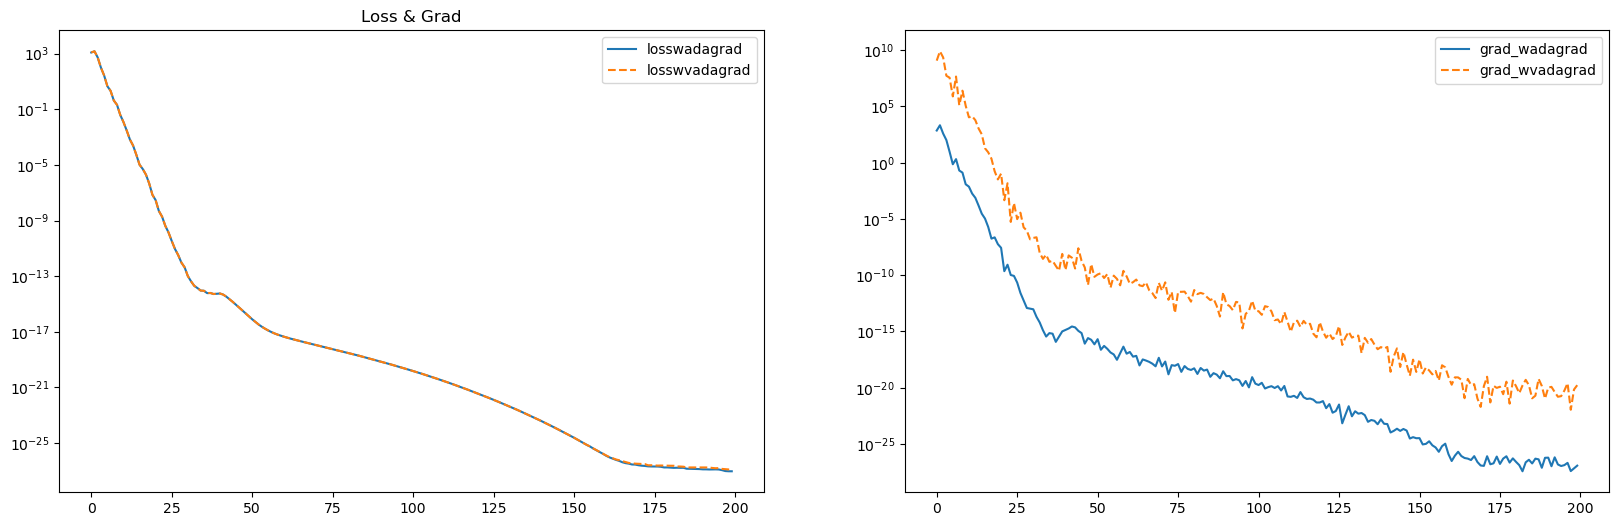

In [39]:
alpha = 0.15
alpha1 = 0.3
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
momentum = torch.zeros(d)
vmomentum = torch.zeros(d)

momentum1 = torch.zeros(d)
vmomentum1 = torch.zeros(d)

data = torch.utils.data.TensorDataset(tA, tb)
BS = 8
torch.manual_seed(0)

trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)
w = torch.zeros(d, requires_grad=True)
wv = torch.zeros(d, requires_grad=True)
wadagrad = torch.zeros(d, requires_grad=True)
wvadagrad = torch.zeros(d, requires_grad=True)
hist_grad_w = []
hist_grad_wv = []
hist_grad_wadagrad = []
hist_grad_wvadagrad = []


hist_lossw =[]
hist_losswv = []
hist_losswadagrad = []
hist_losswvadagrad = []

hist_wada_wvada = []
hist_wada_wvada.append(torch.norm(wadagrad-wvadagrad))

for step in range(200):
    losswadagrad = fun(tA,wadagrad,tb)
    losswvadagrad = fun(Atilde,wvadagrad,tb)
    # lossw = fun(tA,w,tb)
    # losswv = fun(Atilde,wv,tb)
    
    hist_losswadagrad.append(losswadagrad.item())
    hist_losswvadagrad.append(losswvadagrad.item())
    # hist_lossw.append(lossw.item())
    # hist_losswv.append(losswv.item())
    # print('loss=',loss.item())
    for i,(xx,yy) in enumerate(trainloader):
        losswadagrad = fun(xx,wadagrad,yy)
        # lossw = fun(xx,w,yy)
        xxv = xx*v.T
        
        losswvadagrad = fun(xxv,wvadagrad,yy)
        # losswv = fun(xxv,wv,yy)
        # precond = torch.min((loss / (torch.linalg.norm(g) ** 2 + epsilon)), eta)
        
        grad_wadagrad, = torch.autograd.grad(losswadagrad,wadagrad,create_graph=True)
        grad_wvadagrad, = torch.autograd.grad(losswvadagrad,wvadagrad,create_graph=True)
        # grad_w, = torch.autograd.grad(lossw,w,create_graph=True)
        # grad_wv, = torch.autograd.grad(losswv,wv,create_graph=True)

        momentum = beta1*momentum + (1-beta1)*grad_wadagrad
        vmomentum = beta2*vmomentum + (1-beta2)*grad_wadagrad**2
        mhat = momentum/(1-beta1**(i+1))
        vhat = vmomentum/(1-beta2**(i+1))

        momentum1 = beta1*momentum1 + (1-beta1)*grad_wvadagrad
        vmomentum1 = beta2*vmomentum1 + (1-beta2)*grad_wvadagrad**2
        mhat1 = momentum1/(1-beta1**(i+1))
        vhat1 = vmomentum1/(1-beta2**(i+1))
        if step<40:
            wadagrad = wadagrad - 1.5**(i+1)*alpha/(vhat)*mhat
            wvadagrad = wvadagrad - 1.5**(i+1)*alpha/(vhat1)*mhat1
        else:
            wadagrad = wadagrad - 1.1**(i+1)*alpha/(vhat)*mhat
            wvadagrad = wvadagrad - 1.1**(i+1)*alpha/(vhat1)*mhat1
        

    
    hist_grad_wadagrad.append((torch.norm(grad_wadagrad)**2).item())
    hist_grad_wvadagrad.append((torch.norm(grad_wvadagrad)**2).item())
    # hist_grad_w.append((torch.norm(grad_w)**2).item())
    # hist_grad_wv.append((torch.norm(grad_wv)**2).item())


fig,(ax1,ax3) = plt.subplots(1,2);fig.set_size_inches(20, 6)
# ax1.semilogy(torch.tensor(hist_grad),label='grad')

ax1.semilogy(torch.tensor(hist_losswadagrad),label='losswadagrad')
ax1.semilogy(torch.tensor(hist_losswvadagrad),label='losswvadagrad',linestyle='--')
# ax1.semilogy(torch.tensor(hist_lossw),label='lossw')
# ax1.semilogy(torch.tensor(hist_losswv),label='losswv',linestyle='--')
ax1.title.set_text('Loss & Grad')
ax1.legend()
# ax2.semilogy(torch.tensor(hist_wada_wvada),label = 'w-wv2')

# ax2.legend()


ax3.semilogy(torch.tensor(hist_grad_wadagrad),label='grad_wadagrad')
ax3.semilogy(torch.tensor(hist_grad_wvadagrad),label='grad_wvadagrad',linestyle='--')
# ax3.semilogy(torch.tensor(hist_grad_w),label='grad_w')
# ax3.semilogy(torch.tensor(hist_grad_wv),label='grad_wv',linestyle='--')
ax3.legend()

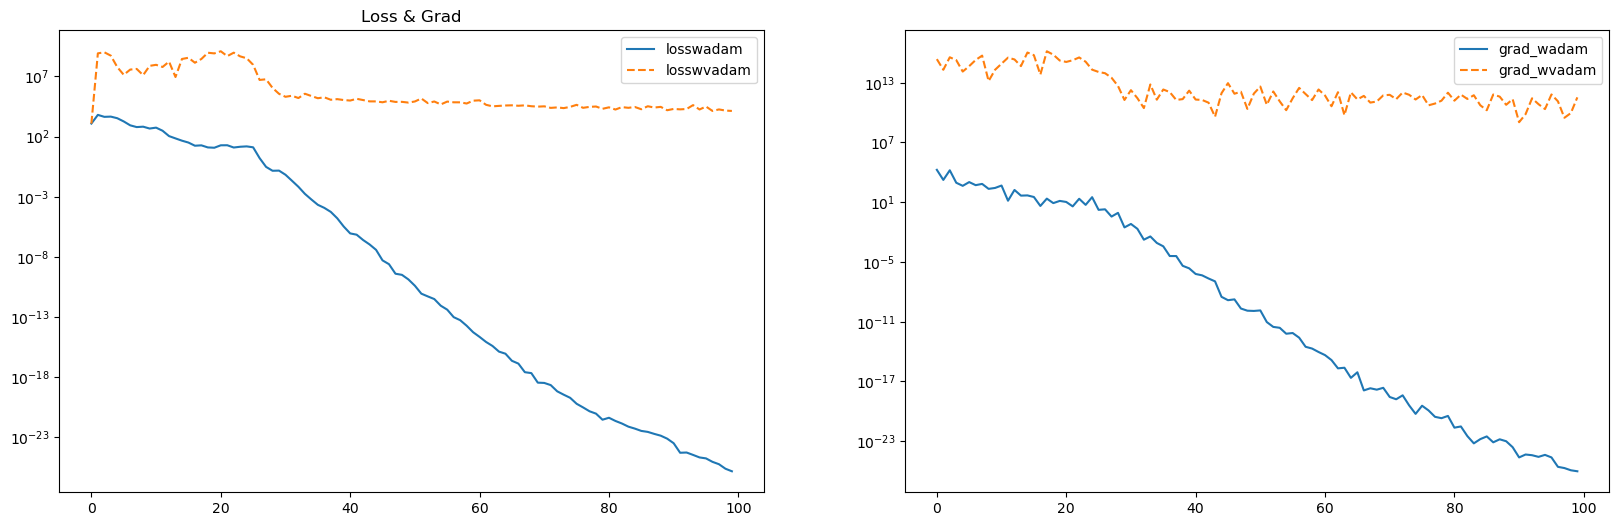

In [91]:
alpha = 1
alpha1 = 0.3
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
momentum = torch.zeros(d)
vmomentum = torch.zeros(d)

momentum1 = torch.zeros(d)
vmomentum1 = torch.zeros(d)

data = torch.utils.data.TensorDataset(tA, tb)
BS = 8
torch.manual_seed(0)

trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)
w = torch.zeros(d, requires_grad=True)
wv = torch.zeros(d, requires_grad=True)
wadagrad = torch.zeros(d, requires_grad=True)
wvadagrad = torch.zeros(d, requires_grad=True)
hist_grad_w = []
hist_grad_wv = []
hist_grad_wadagrad = []
hist_grad_wvadagrad = []


hist_lossw =[]
hist_losswv = []
hist_losswadagrad = []
hist_losswvadagrad = []

hist_wada_wvada = []
hist_wada_wvada.append(torch.norm(wadagrad-wvadagrad))

for step in range(100):
    losswadagrad = fun(tA,wadagrad,tb)
    losswvadagrad = fun(Atilde,wvadagrad,tb)
    # lossw = fun(tA,w,tb)
    # losswv = fun(Atilde,wv,tb)
    
    hist_losswadagrad.append(losswadagrad.item())
    hist_losswvadagrad.append(losswvadagrad.item())
    # hist_lossw.append(lossw.item())
    # hist_losswv.append(losswv.item())
    # print('loss=',loss.item())
    for i,(xx,yy) in enumerate(trainloader):
        losswadagrad = fun(xx,wadagrad,yy)
        # lossw = fun(xx,w,yy)
        xxv = xx*v.T
        
        losswvadagrad = fun(xxv,wvadagrad,yy)
        # losswv = fun(xxv,wv,yy)
        # precond = torch.min((loss / (torch.linalg.norm(g) ** 2 + epsilon)), eta)
        
        grad_wadagrad, = torch.autograd.grad(losswadagrad,wadagrad,create_graph=True)
        grad_wvadagrad, = torch.autograd.grad(losswvadagrad,wvadagrad,create_graph=True)
        # grad_w, = torch.autograd.grad(lossw,w,create_graph=True)
        # grad_wv, = torch.autograd.grad(losswv,wv,create_graph=True)

        momentum = beta1*momentum + (1-beta1)*grad_wadagrad
        vmomentum = beta2*vmomentum + (1-beta2)*grad_wadagrad**2
        mhat = momentum/(1-beta1**(i+1))
        vhat = vmomentum/(1-beta2**(i+1))

        momentum1 = beta1*momentum1 + (1-beta1)*grad_wvadagrad
        vmomentum1 = beta2*vmomentum1 + (1-beta2)*grad_wvadagrad**2
        mhat1 = momentum1/(1-beta1**(i+1))
        vhat1 = vmomentum1/(1-beta2**(i+1))
        if step<25:
            wadagrad = wadagrad - 1.1**(i+1)*alpha/(vhat**(1/2))*mhat
            wvadagrad = wvadagrad - 1.1**(i+1)*alpha/(vhat1**(1/2))*mhat1
        else:
            wadagrad = wadagrad - 1.01**(i+1)*alpha/(vhat**(1/2))*mhat
            wvadagrad = wvadagrad - 1.01**(i+1)*alpha/(vhat1**(1/2))*mhat1

        # wadagrad = wadagrad - alpha/(vhat**(1/2)+eps)*mhat
        # wvadagrad = wvadagrad - alpha/(vhat1**(1/2)+eps)*mhat1
        

    
    hist_grad_wadagrad.append((torch.norm(grad_wadagrad)**2).item())
    hist_grad_wvadagrad.append((torch.norm(grad_wvadagrad)**2).item())
    # hist_grad_w.append((torch.norm(grad_w)**2).item())
    # hist_grad_wv.append((torch.norm(grad_wv)**2).item())


fig,(ax1,ax3) = plt.subplots(1,2);fig.set_size_inches(20, 6)
# ax1.semilogy(torch.tensor(hist_grad),label='grad')

ax1.semilogy(torch.tensor(hist_losswadagrad),label='losswadagrad')
ax1.semilogy(torch.tensor(hist_losswvadagrad),label='losswvadagrad',linestyle='--')
# ax1.semilogy(torch.tensor(hist_lossw),label='lossw')
# ax1.semilogy(torch.tensor(hist_losswv),label='losswv',linestyle='--')
ax1.title.set_text('Loss & Grad')
ax1.legend()
# ax2.semilogy(torch.tensor(hist_wada_wvada),label = 'w-wv2')

# ax2.legend()


ax3.semilogy(torch.tensor(hist_grad_wadagrad),label='grad_wadagrad')
ax3.semilogy(torch.tensor(hist_grad_wvadagrad),label='grad_wvadagrad',linestyle='--')
# ax3.semilogy(torch.tensor(hist_grad_w),label='grad_w')
# ax3.semilogy(torch.tensor(hist_grad_wv),label='grad_wv',linestyle='--')
ax3.legend()

## adagrad

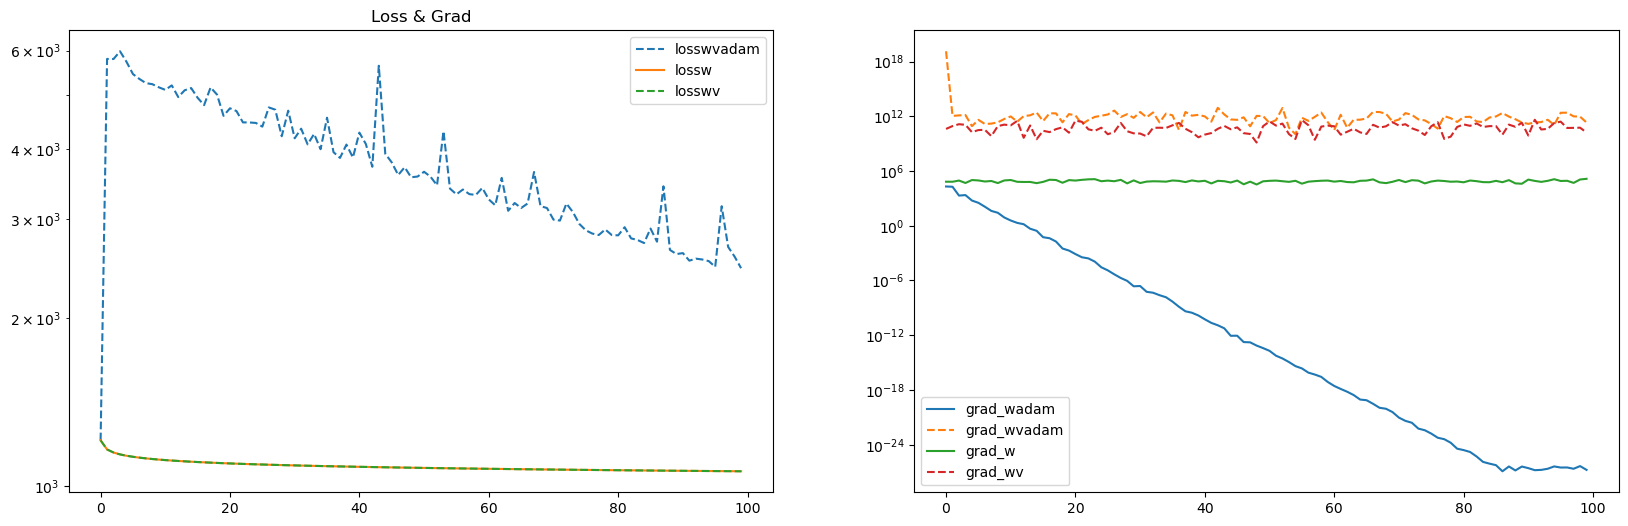

In [52]:
alpha = 1
alpha1 = 1



Gsqr_wadagrad = torch.zeros(d)
Gsqr_wvadagrad = torch.zeros(d)
Gsqr_w = torch.zeros(d)
Gsqr_wv = torch.zeros(d)
data = torch.utils.data.TensorDataset(tA, tb)
BS = 50
torch.manual_seed(0)

trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)
w = torch.zeros(d, requires_grad=True)
wv = torch.zeros(d, requires_grad=True)
wadagrad = torch.zeros(d, requires_grad=True)
wvadagrad = torch.zeros(d, requires_grad=True)
hist_grad_w = []
hist_grad_wv = []
hist_grad_wadagrad = []
hist_grad_wvadagrad = []


hist_lossw =[]
hist_losswv = []
hist_losswadagrad = []
hist_losswvadagrad = []

hist_wada_wvada = []
hist_wada_wvada.append(torch.norm(wadagrad-wvadagrad))

for step in range(100):
    losswadagrad = fun(tA,wadagrad,tb)
    losswvadagrad = fun(Atilde,wvadagrad,tb)
    lossw = fun(tA,w,tb)
    losswv = fun(Atilde,wv,tb)
    
    hist_losswadagrad.append(losswadagrad.item())
    hist_losswvadagrad.append(losswvadagrad.item())
    hist_lossw.append(lossw.item())
    hist_losswv.append(losswv.item())
    # print('loss=',loss.item())
    for i,(xx,yy) in enumerate(trainloader):
        
        losswadagrad = fun(xx,wadagrad,yy)
        lossw = fun(xx,w,yy)
        xxv = xx*v.T
        
        losswvadagrad = fun(xxv,wvadagrad,yy)
        losswv = fun(xxv,wv,yy)
        # precond = torch.min((loss / (torch.linalg.norm(g) ** 2 + epsilon)), eta)
        
        grad_wadagrad, = torch.autograd.grad(losswadagrad,wadagrad,create_graph=True)
        grad_wvadagrad, = torch.autograd.grad(losswvadagrad,wvadagrad,create_graph=True)
        grad_w, = torch.autograd.grad(lossw,w,create_graph=True)
        grad_wv, = torch.autograd.grad(losswv,wv,create_graph=True)
        
        Gsqr_wadagrad+= grad_wadagrad**2
        Gsqr_wvadagrad+= grad_wvadagrad**2
        Gsqr_w+= grad_w**2 
        Gsqr_wv+= grad_wv**2

        # print(torch.norm(Gsqr_wadagrad),torch.norm(Gsqr_wvadagrad))
        # print(grad_wdiag,grad_wvdiag)
        # print(precondwdiag,precondwvdiag)
        # print((grad_wv2.reshape(-1,1)).shape)
        # print((1/v**2*grad_wv2.reshape(-1,1)).shape)
        # print(grad_wv2[0].reshape(-1,1).T@(1/v**2*grad_wv2[0].reshape(-1,1)))

        # print(grad_wv2.reshape(1,-1)@(1/v**2*grad_wv2.reshape(-1,1)))
        
        # precondwv2 = losswv2 / (grad_wv2[0].reshape(-1,1).T@(1/v**2*grad_wv2[0].reshape(-1,1)))
        # print(precondwv2.item())
        # print(((1/v**2).reshape(-1))*grad_wv2)

        wadagrad = wadagrad - alpha/(Gsqr_wadagrad)**(1/2)*grad_wadagrad
        wvadagrad = wvadagrad - alpha/(Gsqr_wvadagrad)**(1/2)*grad_wvadagrad
        w = w - alpha1/Gsqr_w*grad_w
        wv = wv - alpha1/Gsqr_wv*grad_wv
        # if alpha1 < 200:
        #     alpha1 = alpha1*1.05
        # else:
        #     alpha1 = alpha1*1.02


        # print(torch.norm(wadagrad),torch.norm(w))


    # break
    #hist_loss.append(fun(tA,w,tb).item())

    
    hist_grad_wadagrad.append((torch.norm(grad_wadagrad)**2).item())
    hist_grad_wvadagrad.append((torch.norm(grad_wvadagrad)**2).item())
    hist_grad_w.append((torch.norm(grad_w)**2).item())
    hist_grad_wv.append((torch.norm(grad_wv)**2).item())


fig,(ax1,ax3) = plt.subplots(1,2);fig.set_size_inches(20, 6)
# ax1.semilogy(torch.tensor(hist_grad),label='grad')

# ax1.semilogy(torch.tensor(hist_losswadagrad),label='losswadagrad')
ax1.semilogy(torch.tensor(hist_losswvadagrad),label='losswvadagrad',linestyle='--')
ax1.semilogy(torch.tensor(hist_lossw),label='lossw')
ax1.semilogy(torch.tensor(hist_losswv),label='losswv',linestyle='--')
ax1.title.set_text('Loss & Grad')
ax1.legend()
# ax2.semilogy(torch.tensor(hist_wada_wvada),label = 'w-wv2')

# ax2.legend()


ax3.semilogy(torch.tensor(hist_grad_wadagrad),label='grad_wadagrad')
ax3.semilogy(torch.tensor(hist_grad_wvadagrad),label='grad_wvadagrad',linestyle='--')
ax3.semilogy(torch.tensor(hist_grad_w),label='grad_w')
ax3.semilogy(torch.tensor(hist_grad_wv),label='grad_wv',linestyle='--')
ax3.legend()

In [69]:
1 / Gsqr_w * grad_w *alpha1

np.sqrt(alpha1)


131.50125784630401

# SPS-D

torch.Size([1, 20])
loss= 14248.9342353893
loss= 11995.06766452509
loss= 9588.700699331008
loss= 7500.825710046813
loss= 5368.835794903757
loss= 3476.3326806704245
loss= 1549.3854014822225
loss= 15.59404427161522
loss= 210.83068396073062
loss= 46.72853967073647
loss= 25.473369572591906
loss= 46.67569088521682
loss= 253.0540967150968
loss= 20.6377101620081
loss= 35.80435595812661
loss= 185.50198559764254
loss= 5.078718934536944
loss= 14.398265159818262
loss= 23.356935903804874
loss= 182.75528254509408
loss= 13.151632951948859
loss= 246.13494869667417
loss= 26.04440299719487
loss= 6.890061700081105
loss= 23.14809348670025
loss= 13.225747657267556
loss= 47.40753996021292
loss= 14.10619260864967
loss= 65.43623089480032
loss= 67.67892751610162
loss= 3.9364689763740346
loss= 120.38162735648096
loss= 121.44575536012451
loss= 19.30691782689201
loss= 11.62814280389116
loss= 28.960863058340106
loss= 4.986316723583485
loss= 54.25113612129372
loss= 7.80276209309569
loss= 108.07320070612938
loss= 1

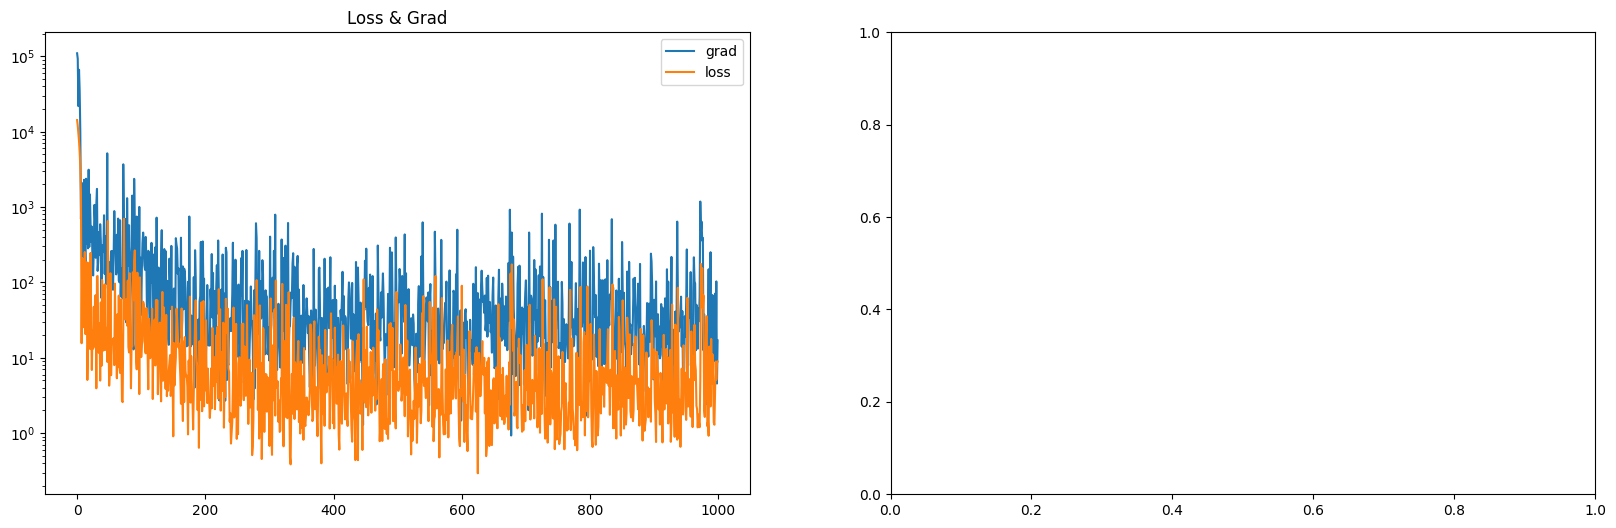

In [18]:
w = torch.zeros(d, requires_grad=True)
alpha = 1e-1
beta = 0.999

data = torch.utils.data.TensorDataset(tA, tb)
BS = 50
trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)

loss=fun(tA,w,tb)
grad_f, = torch.autograd.grad(loss, w, create_graph=True)
hist_grad=[]
hist_loss=[]
# Ds = []
# for j in range(100):
#     z = rademacher(train_data.shape[1]).to(device=device)
#     hvp = torch.autograd.grad(g,  w,  grad_outputs = z, retain_graph = True)[0]
#     Ds.append( (hvp*z) ) 

# Dk = torch.mean(torch.stack(Ds), 0)

Dk = diag_estimate1(d, grad_f, w, 100)
print(Dk.shape)
for step in range(1000):
    loss=fun(tA,w,tb)
    print('loss=',loss.item())
    hist_loss.append(loss.item())    
    grad_f, = torch.autograd.grad(loss, w, create_graph=True) 

    # print(f"Loss: {loss.item()} | GradNorm^2: {(torch.linalg.norm(g) ** 2).item()}")

    
    for i,(xx,yy) in enumerate (trainloader):
        #print('loss=',lgstc(X,y,w).item())
        loss = fun(xx,w,yy)

        grad_f, = torch.autograd.grad(loss, w, create_graph=True)
            
        #print(f"Loss: {loss.item()} | GradNorm^2: {(torch.linalg.norm(g) ** 2).item()}")

        # if i%1 == 0: print(f"Accuracy: {np.mean(trainX.dot(w.cpu().data.numpy())*trainY > 0)}")

        vk = diag_estimate1(d, grad_f, w, 1)

        # print(vk)

        # Smoothing and Truncation        
        Dk = beta * Dk + (1 - beta) * vk
        Dk_hat = torch.abs(Dk)
        Dk_hat[Dk_hat < alpha] = alpha


        Dk_hat_inv = 1 / Dk_hat
        # print(torch.norm(Dk_hat_inv).item(), torch.norm(w).item() , torch.norm(g).item() , loss.item() )
        gnorm = ((grad_f * Dk_hat_inv).flatten()).dot(grad_f)
        #print(gnorm)
        if gnorm.item() < 1e-13:
            continue
        precond = (loss / (gnorm ** 2)) * Dk_hat_inv
        
        with torch.no_grad():
            w.sub_((precond * grad_f).flatten())
    hist_grad.append((torch.norm(grad_f) ** 2).item())

fig,(ax1,ax2) = plt.subplots(1,2);fig.set_size_inches(20, 6)
ax1.semilogy(torch.tensor(hist_grad),label='grad')
ax1.semilogy(torch.tensor(hist_loss),label='loss')
ax1.title.set_text('Loss & Grad')
ax1.legend()

loss= 14248.9342353893
302512458734428.06 -1646234370498277.2 -3249782373.99776 -1604.3646054466094
coeffienct (A=2.710090551908828e+30,B=5.349907808777133e+24, C=2.6376050094551685e+18)
DET= 9.639966415723925e+45
v= 5.441874938196126
155720989401103.75 -895409602731140.6 -1770507513.8095438 -871.3802580840764
coeffienct (A=8.017591837786845e+29,B=1.5853306508024665e+24, C=7.939701042995871e+17)
DET= -1.1006006232628226e+46
v1= -1.0546164663796396e-06
v2= 5.7500913273434415
v3= -9.227653354046495e-07
v1v2v3= 5.595779101040698e-12
v= 5.7500913273434415
24715427809280.418 -243150426719086.28 -466721745.4792404 -223.69816342298375
coeffienct (A=5.912216461935657e+28,B=1.1348364133151637e+23, C=5.465227602546566e+16)
DET= -1.5368863380044546e+43
v1= -1.008604450707629e-06
v2= 9.838003858807708
v3= -9.121503255305013e-07
v1v2v3= 9.050952512300319e-12
v= 9.838003858807708
23702792390733.78 -146479340651688.56 -302707582.1664569 -155.32872456095376
coeffienct (A=2.145621876279835e+28,B=4.4340

/tmp/ipykernel_532296/1343726560.py:113: RuntimeWarning: invalid value encountered in double_scalars
  v1= -cc/bb


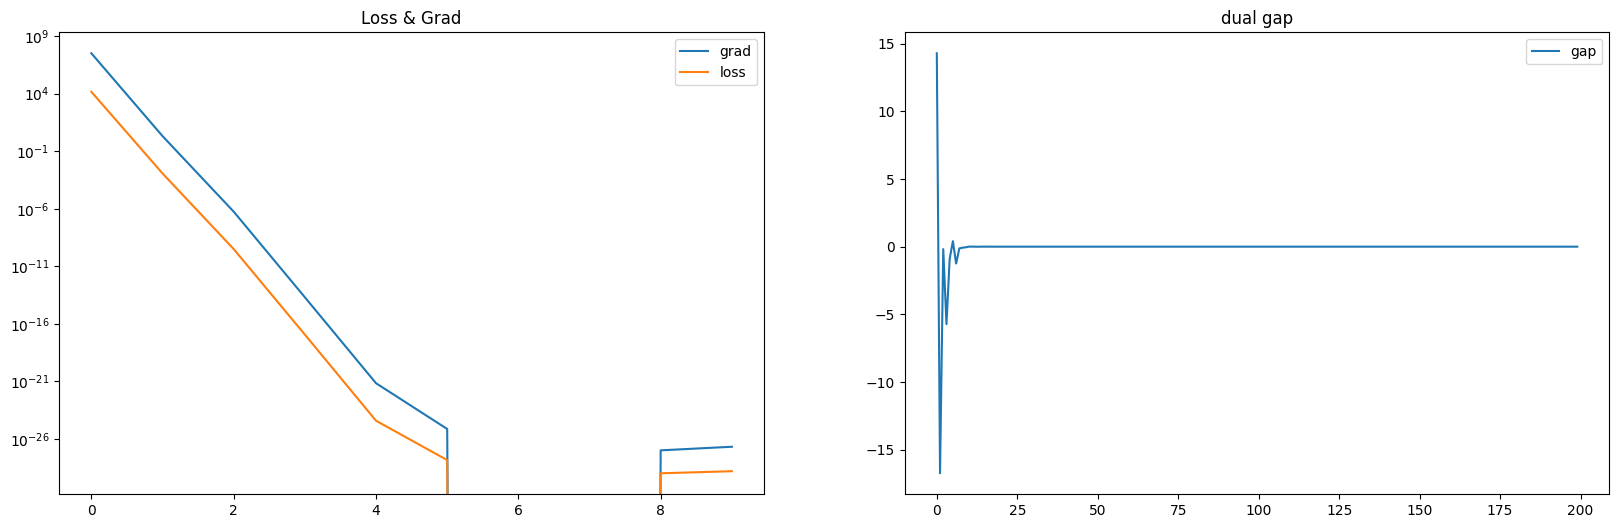

In [20]:
# sk = torch.ones(d,1)
w = torch.zeros(d, requires_grad=True)
#w1 = torch.zeros(d,1).double()
fvalN = []
data = torch.utils.data.TensorDataset(tA, tb)
BS = 50
trainloader = torch.utils.data.DataLoader(data, batch_size=BS, shuffle=True)
#H = d2lgstc(X,y,np.array(w1),lmd)
#H1=torch.diag(H,0)
#print(H1)
loss = fun(tA,w,tb)
grad_f, = torch.autograd.grad(loss, w, create_graph=True)

#print(torch.norm(Dk-H1))
alpha = 1e-4
beta = 0.999
v=torch.zeros(1,requires_grad=True)
gamma=0.01
hist_d=[]
hist_gap=[]
hist_grad=[]
hist_gradd=[]
hist_loss=[]
Dk = diag_estimate1(d, grad_f, w, 100)
Dk_hat = torch.abs(Dk)
Dk_hat[Dk_hat < alpha] = alpha
D=torch.diagflat(Dk_hat)


#print(B)
for it in range(10):
    loss=fun(tA,w,tb)
    print('loss=',loss.item())
    hist_loss.append(loss.item())    
    grad_f, = torch.autograd.grad(loss, w, create_graph=True) 
    hist_d.append((torch.norm(grad_f)**2).item())
    #hist_grad.append(grad_f)  
    
    
    #print('prime=',0.5*torch.dot(dk,D@dk))
    #print('dual=',-g_v(v,loss.item(),grad_f,B,D))
    
    
    
    
    for i,(xx,yy) in enumerate (trainloader):
        # print('loss=',fun(tA,w,tb).item())
        loss = fun(xx,w,yy)
        # print('sampleloss=',loss.item())
        # hist_loss.append(loss.item())   
        grad_f, = torch.autograd.grad(loss, w, create_graph=True) 
        #print(grad_f)
        hist_gradd.append(grad_f)
        
# generate random vector sk from unit sphere
        sk= torch.randn(d,1)
        sk=sk/sk.norm()

        vk = diag_estimate1(d, grad_f, w, 1)
        Dk = beta * Dk + (1 - beta) * vk
        Dk_hat = torch.abs(Dk)
        Dk_hat[Dk_hat < alpha] = alpha

        D=torch.diagflat(Dk_hat)
        
        yk=D@sk
        B=yk.T*yk/sk.T*yk
        
        # 
        # D=torch.diagflat(Dk_hat)

        # print(Dk_hat)
        # print(torch.norm(Dk_hat-H1))
        
        # this is much faster for find the lagrangian multiplier
        #st=time.time()
        D_inv=torch.linalg.inv(D)
        a=torch.dot(grad_f,D_inv@grad_f)
        a=a.detach().numpy()
        b=torch.dot(grad_f,D_inv@B@D_inv@grad_f)
        b=b.detach().numpy()
        c=torch.trace(B@D_inv)
        c=c.detach().numpy()

        aa=2*a*c**2
        bb=4*a*c-2*c**2*loss.item()-b*c
        cc=2*a-2*b-4*c*loss.item()
        dd=-2*loss.item()

        print(aa,bb,cc,dd)
        # print('-d/a=', -d/a)
        AA=bb*bb-3*aa*cc
        if abs(AA) < 1e-14: AA=0
        BB=bb*cc-9*aa*dd
        if abs(BB) < 1e-14: BB=0
        CC=cc*cc-3*bb*dd
        if abs(CC) < 1e-14: CC=0
        DET=-18*aa*bb*cc*dd+4*bb**3*dd+4*aa*cc**3+27*aa**2*dd**2-bb**2*cc**2
        print("coeffienct (A={},B={}, C={})".format(AA,BB,CC))
        if abs(DET)< 1e-14:
            DET=0
        print('DET=',DET)
        # print('det=',-18*a*b*c*d+4*b**3*d+4*a*c**3+27*a**2*d**2-b**2*c**2)
        third = 1./3.
        sqr3 = math.sqrt(3)
        if DET>0:
            Y1=np.cbrt(AA*bb+1.5*aa*(-BB+math.sqrt(DET)))
            Y2=np.cbrt(AA*bb+1.5*aa*(-BB-math.sqrt(DET)))
            v=(-bb-Y1-Y2)/(3*aa)
        
        elif DET==0:
            if (AA==0)&(BB==0):
                v1= -cc/bb
                v2 = v1
                v3 = v1
                
            if (AA!=0)&(BB!=0):
                K=(bb*cc-9*aa*dd)/(bb*bb-3*aa*cc)
                K=round(K,14)
                v1= -bb/aa + K
                v2= -0.5*K
                v3=v2
            
        elif DET<0:
            sqA=math.sqrt(AA)
            T=(AA*bb-1.5*aa*BB)/(AA**(3/2))
            # print('T=',T)
            if -1< T <1 : 
                T=T
            else:
                T=1
            # print('T=',T)
            theta=math.acos(T)
            csth=math.cos(theta/3)
            snth=sqr3*math.sin(theta/3)
            v1=(-bb-2*sqA*csth)/(3*aa)
            v2=(-bb+sqA*(csth+snth))/(3*aa)
            v3=-dd/aa/v1/v2
            print('v1=',v1)
            print('v2=',v2)
            print('v3=',v3)
            print('v1v2v3=',v1*v2*v3)
            v1=np.max([v1,v2,v3])
            v3=np.min([v1,v2,v3])
            #v1=torch.tensor(v1,dtype=torch.float64)
            #v3=torch.tensor(v3,dtype=torch.float64)
            if v3<0:
                v=v1
            else:
                if g_v(v1,loss.item(),grad_f,B,D)>g_v(v3,loss.item(),grad_f,B,D):
                    print('gv1=',g_v(v1,loss.item(),grad_f,B,D))
                    print('gv3=',g_v(v3,loss.item(),grad_f,B,D))
                    v=v3
                else:
                    v=v1
        


        

        #p=np.array([a,b,c,d])
        #p=np.array([2*c*2 ,(4*a-2*c*2*loss.item()-b)/a,(2*a-2*b-4*c*loss.item())/a*c,(-2*loss.item())/a*c ])

        #p=np.array([1 ,(4*a*c-b*c-2*c**2*loss.item())/2*a*c**2, (2*a-2*b-4*c*loss.item())/2*a*c**2, -loss.item()/a*c**2 ])
        #p=np.array([a ,(4*a*c-b*c-2*c**2*loss.item())/2*c**2, (2*a-2*b-4*c*loss.item())/2*c**2, -loss.item()/c**2 ])

        #print(p)
        #roots = fqs.cubic_roots(p)
        #print(roots)
        #print('time=:', time.time() - st)

        #arg=torch.argmin(torch.tensor([g_v(torch.tensor(roots[0][0].real),loss.item(),grad_f,B,D),g_v(torch.tensor(roots[0][1].real),loss.item(),grad_f,B,D),g_v(torch.tensor(roots[0][2].real),loss.item(),grad_f,B,D)]))
        #print('arg=',arg)
        
        
        #v=roots[0][0].real
        print('v=',v)
        #print('prime=', -g_v(v,loss.item(),grad_f,B,D))
        
        D_inv=torch.linalg.inv(D)
        dk=v*(D_inv-1/(1+v*torch.trace(B@D_inv))*(D_inv@B@D_inv))@grad_f
        w=w-dk
        #hist_g.append(0.5*torch.dot(dk,D@dk))
        
        #print('dual=',0.5*torch.dot(dk,D@dk))
        #print(-g_v(v,loss.item(),grad_f,B,D))
        hist_gap.append(0.5*torch.dot(dk,D@dk)+g_v(v,loss.item(),grad_f,B,D))

fig,(ax1,ax2) = plt.subplots(1,2);fig.set_size_inches(20, 6)
ax1.semilogy(torch.tensor(hist_d),label='grad')
ax1.semilogy(torch.tensor(hist_loss),label='loss')
ax1.title.set_text('Loss & Grad')
ax1.legend()
ax2.plot(torch.tensor(hist_gap),label='gap')
ax2.title.set_text('dual gap')
ax2.legend()

In [21]:
w

tensor([ 0.1644,  0.2248, -3.5159,  0.4204, -0.3749,  0.3374, -0.4104,  0.2001,
         0.3023, -1.1248, -1.4284, -0.6655,  1.1863, -0.5691,  0.7205, -1.6708,
        -0.8384,  1.5804, -0.7533, -0.6955], grad_fn=<SubBackward0>)

In [22]:
torch.norm((w-xopt)**2)

tensor(1.5135e-32, grad_fn=<CopyBackwards>)